In [1]:
import pandas as pd
import numpy as np 

import torch

from dataset import WebcamDataset
from model import CNN_LSTM
from trainer import Trainer
from torch.utils.data import DataLoader
from plotting import plot_predictions_vs_ground_truth
import matplotlib.pyplot as plt


In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
BATCH_SIZE = 32

# Data loading

In [4]:
train_dataset = WebcamDataset(images_path="data/X_BC_train.npy", ghi_values_path="data/labels_train.npy", subset=640)
val_dataset = WebcamDataset(images_path="data/X_BC_val.npy", ghi_values_path="data/labels_val.npy",subset=640)
test_dataset = WebcamDataset(images_path="data/X_BC_test.npy", ghi_values_path="data/labels_test.npy",subset=640)

In [5]:
train_dataset.__shape__()

torch.Size([3, 250, 250])

In [6]:
train_dataset.__len__()

640

# Data visualization

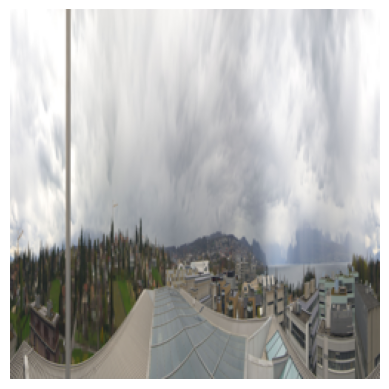

In [7]:
# Get the first image without applying normalization
first_image = train_dataset.images[0]  # Access the raw image before normalization

first_image = first_image.astype(np.uint8)  # Convert to uint8 for display

# Display the image
plt.imshow(first_image)
plt.axis('off')
plt.show()


# Model creation

In [8]:
input_shape = (32, 3, 224, 224)  # Batch size, channels, height, width
model = CNN_LSTM(input_shape=input_shape, out_channels=1)

# Print the model architecture
print(model)

CNN_LSTM(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1))
  (conv3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv4): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1))
  (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
  (bn2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout1): Dropout(p=0.3, inplace=False)
  (dropout2): Dropout(p=0.1, inplace=False)
  (lstm1): LSTM(89888, 128, batch_first=True)
  (lstm2): LSTM(128, 64, batch_first=True)
  (fc1): Linear(in_features=64, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=1, bias=True)
)


We now transform it to Bayesian

In [9]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [10]:
# Create the Trainer object
trainer = Trainer(model, train_dataset, val_dataset, test_dataset, batch_size=BATCH_SIZE, epochs=10, device=device, model_save_folder=None, train_loss_file="output/train_losses.csv", test_loss_file="output/test_losses.csv")

# Start training
trainer.train()

Epoch 1/10, Train Loss: 0.2674, Processed Train Batches: 20, Skipped Train Batches: 0, Train Time: 35.74s
Epoch 1/10, Validation Loss: 0.2493, Processed Validation Batches: 20, Skipped Validation Batches: 0, Eval Time: 14.31s
Epoch 2/10, Train Loss: 0.2054, Processed Train Batches: 20, Skipped Train Batches: 0, Train Time: 36.36s
Epoch 2/10, Validation Loss: 0.2519, Processed Validation Batches: 20, Skipped Validation Batches: 0, Eval Time: 14.46s
Epoch 3/10, Train Loss: 0.1965, Processed Train Batches: 20, Skipped Train Batches: 0, Train Time: 37.44s
Epoch 3/10, Validation Loss: 0.2598, Processed Validation Batches: 20, Skipped Validation Batches: 0, Eval Time: 14.51s
Epoch 4/10, Train Loss: 0.1904, Processed Train Batches: 20, Skipped Train Batches: 0, Train Time: 37.43s
Epoch 4/10, Validation Loss: 0.2453, Processed Validation Batches: 20, Skipped Validation Batches: 0, Eval Time: 16.59s
Epoch 5/10, Train Loss: 0.1992, Processed Train Batches: 20, Skipped Train Batches: 0, Train Tim

In [11]:
# Evaluate on the test set
trainer.evaluate()

(0.2153461158275604, 20, 0)

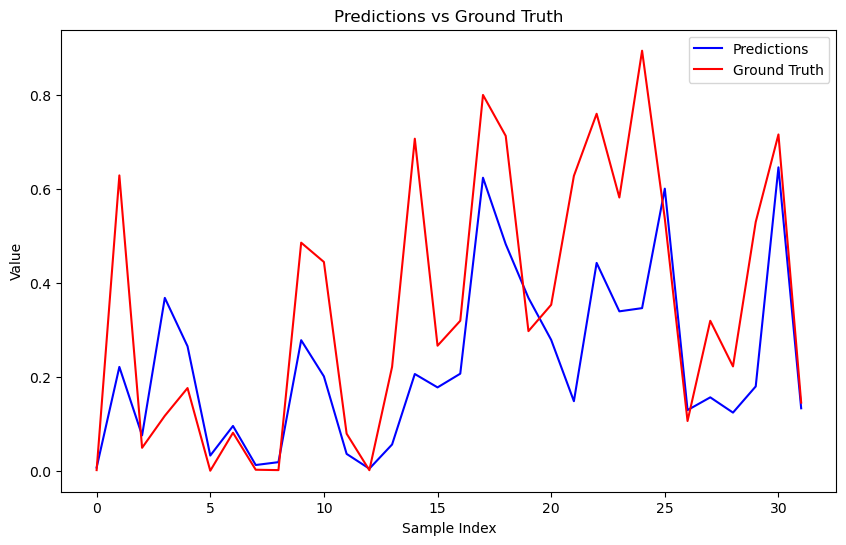

In [16]:
plot_predictions_vs_ground_truth(model, trainer.val_loader, device)
